### Introduction
This notebook goes through a necessary step of any data analysis project - data cleaning. Data cleaning, is an important process. Feeding dirty data into a model will give us results that are meaningless.

Next steps:

1. Cleaning the data - we will walk through popular text pre-processing techniques
2. Organizing the data - we will organize the cleaned data into a way that is easy to input into other algorithms



The goal is to analyze all movie reviews in the IMBD dataset and note their similarities and differences.Since I am very interested in films I would like to help companies develop better quality films from people's feelings. As a result I intend to deliver a Python tool that automatically identifies positive and negative comments. 

With text data, there's always an exception to every cleaning step - start simple and iterate. 

### Cleaning steps:

Make text all lower case
Remove punctuation
Remove numerical values
Tokenize text
Remove stop words

### More data cleaning steps after tokenization:

-Lemmatization
-Create bi-grams 

In [1]:
# Set random seed
seed = 123
# Data manipulation/analysis
import numpy as np
import pandas as pd
# Text preprocessing/analysis
import re
#novas
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer



from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
# Modelling
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", context='talk')

import nltk 
nltk.download ('stopwords') 
nltk.download ('wordnet') 
nltk.download ('vader_lexicon') 
from wordcloud import WordCloud,STOPWORDS


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Roberto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Roberto\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Roberto\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Getting The Data

In [3]:
data = pd.read_csv(r'C:\Users\Roberto\Documents\IronHack\Final Project\IMDB Dataset.csv\IMDB Dataset.csv')

In [4]:
#first look.
data.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [5]:
# More checks
data.keys()

Index(['review', 'sentiment'], dtype='object')

In [6]:
'''data.sentiment = data.sentiment.apply(lambda x: 1 if x=='positive' else 0)'''


"data.sentiment = data.sentiment.apply(lambda x: 1 if x=='positive' else 0)"

In [7]:
data['classification'] = data ['sentiment'].replace(["negative", "positive"], [0,1])


In [8]:
data.head()

review sentiment  classification
0  One of the other reviewers has mentioned that ...  positive               1
1  A wonderful little production. <br /><br />The...  positive               1
2  I thought this was a wonderful way to spend ti...  positive               1
3  Basically there's a family where a little boy ...  negative               0
4  Petter Mattei's "Love in the Time of Money" is...  positive               1

In [9]:
def data_des(data):
    print("DF shape")
    print(data.shape)
    
    print("********************************")
    print("DF info")
    print(data.info())
    
    print("********************************")
    print("DF describe")
    print(data.describe())
    
    print("********************************")
    print("Sum isnull()")
    print(data.isnull().sum())
    
    print("********************************")
    print("Sum isna()")
    print(data.isna().sum())
    
    print("********************************")
    print("Sum eq(' ')")
    print(data.eq(' ').sum())
    
    print("********************************")
    print("Sum eq('')")
    print(data.eq('').sum())
#Calling the function for df      
data_des(data)    

DF shape
(50000, 3)
********************************
DF info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          50000 non-null  object
 1   sentiment       50000 non-null  object
 2   classification  50000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB
None
********************************
DF describe
       classification
count    50000.000000
mean         0.500000
std          0.500005
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
********************************
Sum isnull()
review            0
sentiment         0
classification    0
dtype: int64
********************************
Sum isna()
review            0
sentiment         0
classification    0
dtype: int64
********************************
Sum eq(' ')
review            0
sentiment   

In [10]:
def combine_text(list_of_text): #Takes a list of text and combines them into one large chunk of text.
    '''A wonderful little production. <br /><br />The'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [11]:
# Put it into a pandas dataframe
#import pandas as pd
#pd.set_option('max_colwidth',150)

#data_df = pd.DataFrame.from_dict(data_combined).transpose()
#data_df.columns = ['transcript']
#data_df = data_df.sort_index()
#data_df

In [12]:
data['length'] = data['review'].apply(len)
data.head()

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

   classification  length  
0               1    1761  
1               1     998  
2               1     926  
3               0     748  
4               1    1317

<AxesSubplot:ylabel='Frequency'>

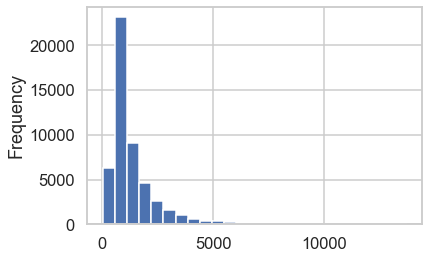

In [13]:
data['length'].plot(bins=25,kind='hist') 

In [14]:
data.length.describe()

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: length, dtype: float64

In [15]:
#Longest review
data[data['length'] == 13704]['review'].iloc[0]

'Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, bu

In [16]:
#Shortest review
data[data['length'] == 52]['review'].iloc[0]

'This movie is terrible but it has some good effects.'

In [17]:
! pip install plotly

In [18]:
import plotly
import plotly.graph_objs as go

In [19]:
lens = data['review'].str.len()

fig = go.Figure()
fig.add_trace(
    go.Histogram(x=lens, xbins=dict(size=200))
    )
fig.update_layout(title='Length of reviews', 
                    xaxis_title="Length",
                    yaxis_title="# of reviews")
plotly.offline.iplot(fig)

array([<AxesSubplot:title={'center':'negative'}>,
       <AxesSubplot:title={'center':'positive'}>], dtype=object)

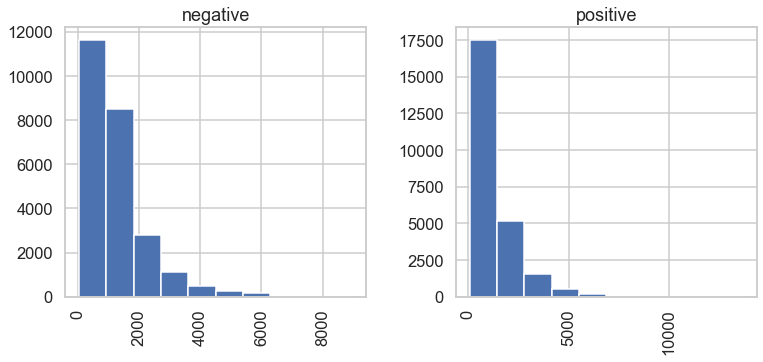

In [20]:
data.hist(column='length', by='sentiment',figsize=(12,5))

In [21]:
poslens = data[data['sentiment']=='positive']['review'].str.len()
neglens = data[data['sentiment']=='negative']['review'].str.len()
fig = go.Figure()
fig.add_trace(
    go.Histogram(x=poslens, xbins=dict(size=200), name='positive'),
    )
fig.add_trace(
    go.Histogram(x=neglens, xbins=dict(size=200), name='negative'),
    )
fig.update_layout(title='Length of reviews', 
                    xaxis_title="Length",
                    yaxis_title="# of reviews",)
plotly.offline.iplot(fig)

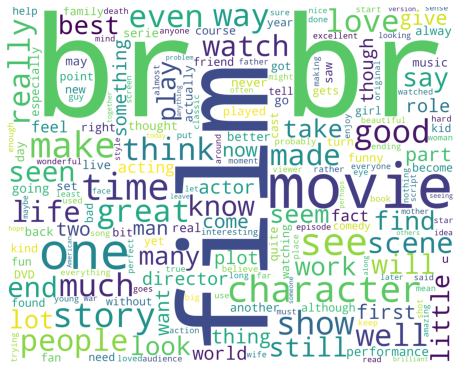

In [22]:
data_pos = data[data['sentiment']=='positive']['review']

wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(data_pos))

plt.figure(1,figsize=(8, 8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

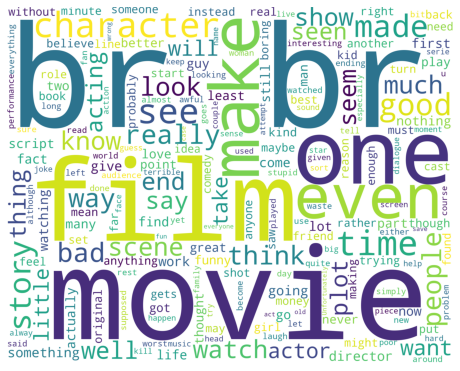

In [23]:
data_neg = data[data['sentiment']=='negative']['review']

wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(data_neg))

plt.figure(1,figsize=(8, 8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

### First cleaning.

#### Make text all lower case

### Make text Lowe Case

In [24]:
data['review_lw'] = data['review'].str.lower()
data[['review','review_lw']].head(5)

review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                           review_lw  
0  one of the other reviewers has mentioned that ...  
1  a wonderful little production. <br /><br />the...  
2  i thought this was a wonderful way to spend ti...  
3  basically there's a family where a little boy ...  
4  petter mattei's "love in the time of money" is...

### Stop Words

In [25]:
sw = stopwords.words('english')

print(f'Stopwords sample: {sw[0:179]}')
print(f'Number of stopwords: {len(sw)}')

Stopwords sample: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same

In [26]:
import string

In [27]:
print(f'Punctuation {string.punctuation}')

Punctuation !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [28]:
def transform_text(s):
    
    # remove html
    html=re.compile(r'<.*?>')
    s = html.sub(r'',s)
    
    # remove numbers
    s = re.sub(r'\d+', '', s)
    
    # remove punctuation
    # remove stopwords
    tokens = nltk.word_tokenize(s)
    
    new_string = []
    for w in tokens:
        # remove words with len = 2 AND stopwords
        if len(w) > 2 and w not in sw:
            new_string.append(w)
    
    
    
    s = ' '.join(new_string)
    s = s.strip()

    exclude = set(string.punctuation)
    s = ''.join(ch for ch in s if ch not in exclude)
    
    return s.strip()

In [29]:
transform_text('a wonderful little production. <br /><br />the filming technique is very unassuming- very old-time-bbc fashion') 

'wonderful little production filming technique unassuming oldtimebbc fashion'

In [30]:
data['review_sw'] = data['review_lw'].apply(transform_text)
data[['review','review_lw', 'review_sw']].head(5)

review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                           review_lw  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production. <br /><br />the...   
2  i thought this was a wonderful way to spend ti...   
3  basically there's a family where a little boy ...   
4  petter mattei's "love in the time of money" is...   

                                           review_sw  
0  one reviewers mentioned watching episode ll ho...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically family little boy jake thinks zombie...  
4  petter mattei love time money visually stunnin...

### Tokenize

In [31]:
data['review_toke'] = data['review_lw'].apply(word_tokenize)
data[['review','review_lw', 'review_sw', 'review_toke']].head(5)

review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                           review_lw  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production. <br /><br />the...   
2  i thought this was a wonderful way to spend ti...   
3  basically there's a family where a little boy ...   
4  petter mattei's "love in the time of money" is...   

                                           review_sw  \
0  one reviewers mentioned watching episode ll ho...   
1  wonderful little production filming technique ...   
2  thought wonderful way spend time hot summer we...   
3  basically family little boy jake thinks zombie...   
4  petter mattei love time money visually stunnin...   

                                         review_toke  
0  [one, of, the, other, reviewers, has, mentione...  
1  [a, wonderful, little, production, ., <, br, /...  
2  [i, thought, this, was, a, wonderful, way, to,...  
3  [basically, there, 's, a, family, where, a, li...  
4  [petter, mattei, 's, ``, love, in, the, time, ...

In [32]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 

In [33]:
def lemmatizer_text(s):
    tokens = nltk.word_tokenize(s)
    
    new_string = []
    for w in tokens:
        lem = lemmatizer.lemmatize(w, pos="v")
        # exclude if lenght of lemma is smaller than 2
        if len(lem) > 2:
            new_string.append(lem)
    
    s = ' '.join(new_string)
    return s.strip()

In [34]:
data['review_lm'] = data['review_sw'].apply(lemmatizer_text)
data[['review', 'review_toke', 'review_lw', 'review_sw', 'review_lm']].head(5)

review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                         review_toke  \
0  [one, of, the, other, reviewers, has, mentione...   
1  [a, wonderful, little, production, ., <, br, /...   
2  [i, thought, this, was, a, wonderful, way, to,...   
3  [basically, there, 's, a, family, where, a, li...   
4  [petter, mattei, 's, ``, love, in, the, time, ...   

                                           review_lw  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production. <br /><br />the...   
2  i thought this was a wonderful way to spend ti...   
3  basically there's a family where a little boy ...   
4  petter mattei's "love in the time of money" is...   

                                           review_sw  \
0  one reviewers mentioned watching episode ll ho...   
1  wonderful little production filming technique ...   
2  thought wonderful way spend time hot summer we...   
3  basically family little boy jake thinks zombie...   
4  petter mattei love time money visually stunnin...   

                                           review_lm  
0  one reviewers mention watch episode hook right...  
1  wonderful little production film technique una...  
2  think wonderful way spend time hot summer week...  
3  basically family little boy jake think zombie ...  
4  petter mattei love time money visually stun fi...

In [35]:
data.rename({'review_toke':'review_tokenize', 'review_lw':'review_lower_case', 'review_sw':'review_stop_words', 'review_lm':'review_lemmatizer'}, axis=1).head(2)


review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   

   classification  length                                  review_lower_case  \
0               1    1761  one of the other reviewers has mentioned that ...   
1               1     998  a wonderful little production. <br /><br />the...   

                                   review_stop_words  \
0  one reviewers mentioned watching episode ll ho...   
1  wonderful little production filming technique ...   

                                     review_tokenize  \
0  [one, of, the, other, reviewers, has, mentione...   
1  [a, wonderful, little, production, ., <, br, /...   

                                   review_lemmatizer  
0  one reviewers mention watch episode hook right...  
1  wonderful little production film technique una...

### BiGrams

A bigram or digram is a sequence of two adjacent elements from a string of tokens. Used for simple statistical analysis of text.

we can touch on some of the core principles. One of them is this idea of understanding the relationships between words in sentences.

In [36]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams 

In [37]:
bgr = 'wonderful little production film technique unassuming oldtimebbc fashion give comfort sometimes.'
tokens = nltk.word_tokenize(bgr)
list(nltk.bigrams(tokens))

[('wonderful', 'little'),
 ('little', 'production'),
 ('production', 'film'),
 ('film', 'technique'),
 ('technique', 'unassuming'),
 ('unassuming', 'oldtimebbc'),
 ('oldtimebbc', 'fashion'),
 ('fashion', 'give'),
 ('give', 'comfort'),
 ('comfort', 'sometimes'),
 ('sometimes', '.')]

In [38]:
from nltk.corpus import genesis
eng_tokens = genesis.words('english-kjv.txt')
eng_bigrams = nltk.bigrams(eng_tokens)
#bigrams with length greater than or equal to 4
filtered_bigrams = [ (w1, w2) for w1, w2 in eng_bigrams if len(w1) >=4 and len(w2) >= 4 ]

In [39]:
#code computes frequency distribution and displays three most frequent bigrams.
eng_bifreq = nltk.FreqDist(filtered_bigrams)
#Most Common top 3
eng_bifreq.most_common(3)

[(('said', 'unto'), 178), (('unto', 'them'), 44), (('thou', 'shalt'), 43)]

In [40]:
from nltk.tokenize import RegexpTokenizer

In [41]:
### Regex to remove some values from the dataset (symbols, numbers...)
token = RegexpTokenizer(r'[a-zA-z0-9]+')

In [42]:
# Create vectorizer according to the parameters below:
cv = CountVectorizer(lowercase= True, stop_words=None, ngram_range = (1, 2),
                     tokenizer = token.tokenize)

In [43]:
# Matrixsparse columns "review"
text_counts = cv.fit_transform(data['review'])

In [44]:
cv.vocabulary_

{'one': 1466400,
 'of': 1429661,
 'the': 2025360,
 'other': 1491422,
 'reviewers': 1702613,
 'has': 922707,
 'mentioned': 1292911,
 'that': 2014805,
 'after': 80062,
 'watching': 2252119,
 'just': 1125708,
 '1': 775,
 'oz': 1511934,
 'episode': 681385,
 'you': 2349169,
 'll': 1212085,
 'be': 243428,
 'hooked': 986891,
 'they': 2070444,
 'are': 175335,
 'right': 1709512,
 'as': 190015,
 'this': 2078093,
 'is': 1079554,
 'exactly': 704745,
 'what': 2271982,
 'happened': 916567,
 'with': 2307408,
 'me': 1279953,
 'br': 319464,
 'first': 776029,
 'thing': 2073794,
 'struck': 1944144,
 'about': 47411,
 'was': 2242224,
 'its': 1098405,
 'brutality': 342536,
 'and': 124749,
 'unflinching': 2178030,
 'scenes': 1769132,
 'violence': 2224772,
 'which': 2280917,
 'set': 1806463,
 'in': 1030146,
 'from': 820347,
 'word': 2326104,
 'go': 867744,
 'trust': 2152024,
 'not': 1407921,
 'a': 28304,
 'show': 1829840,
 'for': 793097,
 'faint': 728888,
 'hearted': 940259,
 'or': 1478591,
 'timid': 2103198,

### Using Naive Bayes - MultinomyNB from scikit-learn, I apply the training and make a prediction of the test data.

In [45]:
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB

In [46]:
from  sklearn.model_selection import train_test_split

from sklearn import metrics


In [47]:
## Create and test the model

In [48]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import csv
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
nltk.classify.scikitlearn.SklearnClassifier(MultinomialNB())

<SklearnClassifier(MultinomialNB())>

In [49]:
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['classification'], 
                                                   test_size=0.34, random_state=1,
                                                   shuffle=True)

In [50]:
clf = MultinomialNB().fit(X_train, y_train)

In [51]:
##Predicting the value of X for accuracy (precision) testing
y_test_predicted = clf.predict(X_test)
y_train_predicted = clf.predict(X_train)
print("MultinomialNB Accruracy on TRAIN set: ", metrics.accuracy_score(y_train, y_train_predicted).round(3))
print("MultinomialNB Kappa on TRAIN set: ", metrics.cohen_kappa_score(y_train, y_train_predicted).round(3))
print()
print()
print("MultinomialNB Accruracy on TEST set: ", metrics.accuracy_score(y_test, y_test_predicted).round(3))
print("MultinomialNB Kappa on TEST set: ",metrics.cohen_kappa_score(y_test, y_test_predicted).round(3))

MultinomialNB Accruracy on TRAIN set:  0.986
MultinomialNB Kappa on TRAIN set:  0.972


MultinomialNB Accruracy on TEST set:  0.882
MultinomialNB Kappa on TEST set:  0.763


In [52]:
y_pred = clf.predict(X_test)
y_pred


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      8489
           1       0.90      0.86      0.88      8511

    accuracy                           0.88     17000
   macro avg       0.88      0.88      0.88     17000
weighted avg       0.88      0.88      0.88     17000



In [54]:
'''from sklearn.metrics import confusion_matrix
print("The values are:")
print(confusion_matrix(y_test, y_test))'''


'from sklearn.metrics import confusion_matrix\nprint("The values are:")\nprint(confusion_matrix(y_test, y_test))'

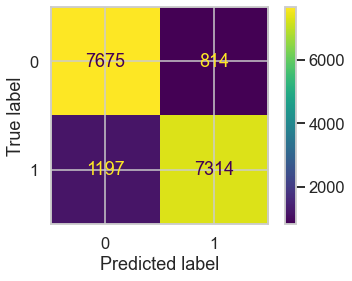

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

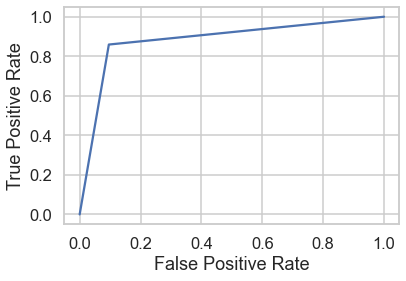

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
y_score = clf.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### Sentiment Analysis Graph

In [ ]:
import pandas as pd

df = pd.read_excel(r'C:\Users\Roberto\Documents\IronHack\Final Project\IMDB Dataset.csv\sentiment_analysis.xlsx')
df.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB



In [ ]:
df['Frase'].values.astype('U')

In [ ]:
vetorizador = CountVectorizer(binary = 'true')
X = vetorizador.fit_transform(df['Frase'].values.astype('U')) 

In [ ]:
y = df.Sentimento

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = BernoulliNB()
clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)
y_true =  y_test

print("Results obtained: ")
print(y_pred)
print("\n Expected results: ")
print(y_true.values)

In [ ]:
from sklearn import metrics

print("Precision Macro " + str(metrics.precision_score(y_true, y_pred, average='macro')))
print("Precision Micro " + str(metrics.precision_score(y_true, y_pred, average='micro')))
print("Precision Weighted " + str(metrics.precision_score(y_true, y_pred, average='weighted')))

In [ ]:
phrase = input("What is your opinion? ")
if phrase == 0:
    print ("Negative Review")
else:
    print ("Positive Review")


In [ ]:
from textblob import TextBlob
def get_sentiment(Frase):
        analysis = TextBlob(Frase)
        if analysis.sentiment.polarity > 0:
            return 'Positive Review'
        elif analysis.sentiment.polarity == 0:
            return 'Positive Review'
        else:
            return 'Negative Review'



In [ ]:
print('---')
check_sentiment = input("What is your opinion about the movie?  ")
print('---')
print(get_sentiment(check_sentiment))